In [12]:
import pymysql
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
connection = pymysql.connect(host = "127.0.0.1",
                             user = "root",
                             password = "12345",
                             database = "capstone")
connection

In [16]:
query = "select * from crime_data"
df = pd.read_sql(query, connection)
df

C:\Users\mdsha\AppData\Local\Temp\ipykernel_9164\3872747894.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


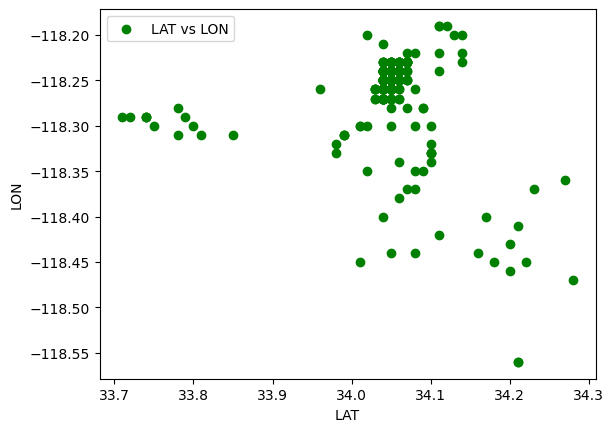

In [75]:
plt.scatter(df["LAT"], df["LON"], color="green", label="LAT vs LON")

plt.xlabel("LAT")
plt.ylabel("LON")
plt.legend()

plt.show()

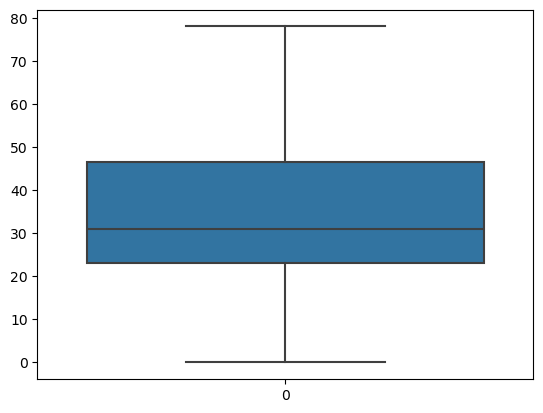

In [28]:
# What is the distribution of victim ages in reported crimes?

sns.boxplot( df["Vict_Age"])
plt.show()

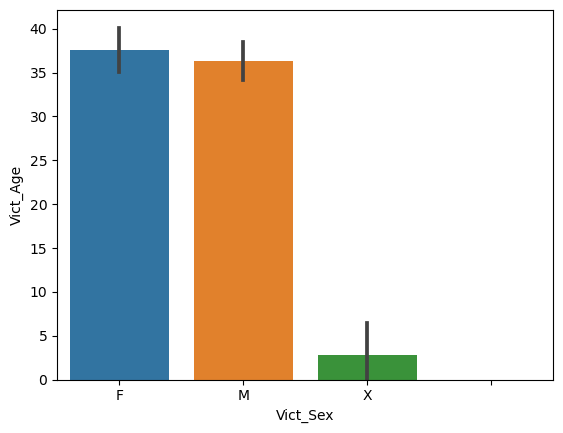

In [26]:
#  Is there a significant difference in crime rates between male and female victims?

sns.lineplot(x = df["Vict_Sex"], y= df["Vict_Age"])
plt.show()

In [60]:
# Where do most crimes occur based on the "Location" column? 


locationwise_count = df["Location"].value_counts()
locationwise_count


Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64

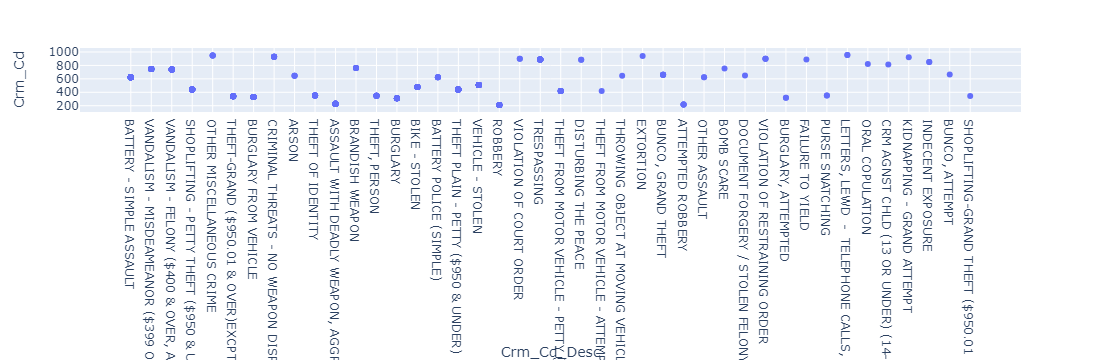

In [64]:
# What is the distribution of reported crimes based on Crime Code?
import plotly.express as px
fig = px.scatter(df, x = "Crm_Cd_Desc", y = "Crm_Cd")
fig
